# Demo 1

Preview of output as more DCT channels arrive

In [1]:
import numpy as np
from PIL import Image
from scipy.fft import dctn, idctn
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)


In [2]:
y, cb, cr = Image.open('images/earth-1024.png').convert('YCbCr').split()

In [3]:
im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

In [4]:
dct = np.zeros((int(im.size / 64), 64))
row = 0

for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        dct[row] = dctn(im[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho').ravel()
        row += 1

In [5]:
# Reconstruct Image from ravelled DCTS
def dct_to_image(dct_recv, shape,):
    im_recv = np.zeros(shape)
    row = 0

    for i in np.r_[:im.shape[0]:8]:
        for j in np.r_[:im.shape[1]:8]:
            im_recv[i:(i+8),j:(j+8)] = idctn(dct_recv[row].reshape((8, 8)), axes=[0, 1], norm='ortho')
            row += 1

    return im_recv

In [6]:
dct_indices = [  0,  1,  8, 16,  9,  2,  3, 10,
                 17, 24, 32, 25, 18, 11,  4,  5, 
                 12, 19, 26, 33, 40, 48, 41, 34,
                 27, 20, 13,  6,  7, 14, 21, 28,
                 35, 42, 49, 56, 57, 50, 43, 36,
                 29, 22, 15, 23, 30, 37, 44, 51,
                 58, 59, 52, 45, 38, 31, 39, 46, 
                 53, 60, 61, 54, 47, 55, 62, 63,
]

In [7]:
dct_recv = np.zeros((int(im.size / 64), 64))

count = 0
for i in dct_indices:
    dct_recv[:, i] = dct[:, i]
    im_recv = dct_to_image(dct_recv, im.shape)
    plt.imsave(f'output/{count}-{i}.png', im_recv, cmap='gray')
    count += 1

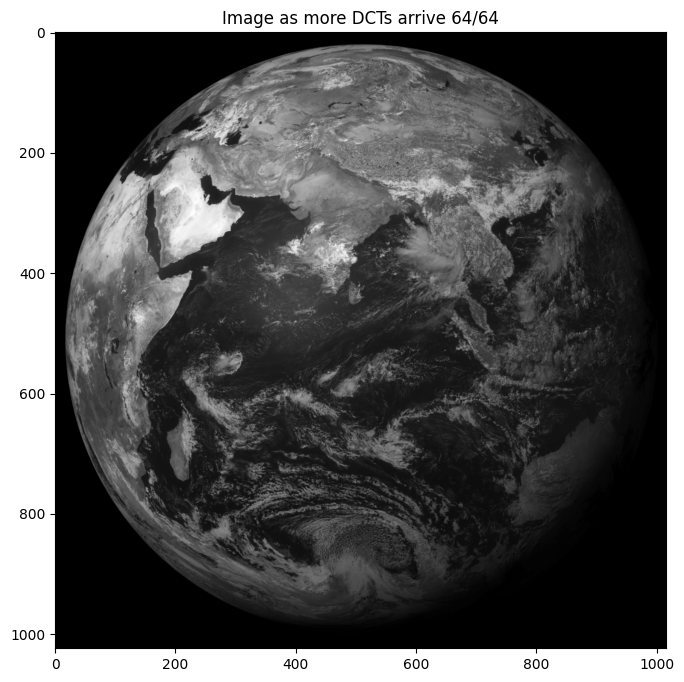

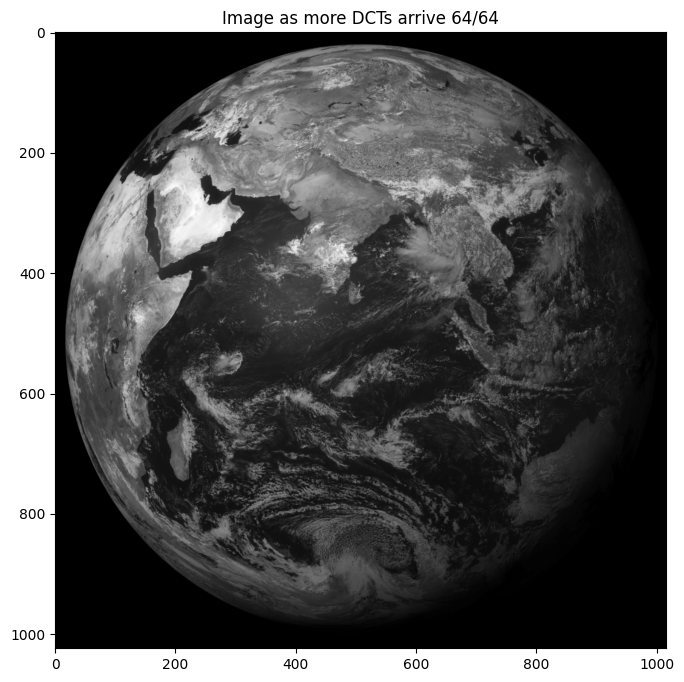

In [8]:
f = plt.figure()
plt.title("Image as more DCTs arrive")

from IPython import display

dct_recv = np.zeros((int(im.size / 64), 64))

count = 0
for i in dct_indices:
    plt.title(f"Image as more DCTs arrive {count+1}/64")

    dct_recv[:, i] = dct[:, i]
    im_recv = dct_to_image(dct_recv, im.shape)
    plt.imshow(im_recv, cmap='gray')

    display.clear_output(wait=True)
    display.display(plt.gcf())

    count += 1